In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

## THIS CODE IS USED TO READ THE IMAGE 

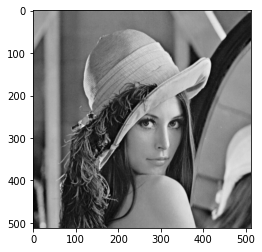

In [2]:
gray_img =  cv2.imread("lena.png",0) 
plt.imshow(gray_img, cmap='gray')
plt.show()

In [4]:
height , width = gray_img.shape
resize_factors = [0.5,1,2]

## INBUILT FUNCTION TO RESIZE IMAGE 

In [10]:
 for factor in resize_factors:
    new_size = (int(factor*height) ,int(factor*width))
    resized_img = cv2.resize(gray_img ,new_size ,interpolation = cv2.INTER_LINEAR)
    cv2.imshow("original image" ,gray_img)
    cv2.imshow("resized image" ,resized_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# User defined function for bilinear interpolation

In [11]:
 def bilinear_interpolation(image, new_size):
        
    height, width = image.shape[:2]
    scaling_x = new_size[0] / width
    scaling_y = new_size[1] / height
    
    new_image = np.zeros((new_size[1], new_size[0]), dtype=np.uint8)
    
    for i in range(new_size[1]):
        for j in range(new_size[0]):
            
            #getting the co ordinates of original image
            x = int(j / scaling_x)
            y = int(i / scaling_y)
            
            # knowing nearest neighboors 
            x1 = int(np.ceil(j / scaling_x))
            y1 = int(np.ceil(i / scaling_y))
            x0 = x1 - 1
            y0 = y1 - 1
            
            
            # calculating the weigts of the corresponding pixel values 
            wx = (j / scaling_x) - x
            wy = (i / scaling_y) - y
            
            # using the bilinear interpolation formula 
            if x0 >= 0 and x1 < width and y0 >= 0 and y1 < height:
                new_image[i, j] = (1 - wy) * ((1 - wx) * image[y0, x0] + wx * image[y0, x1]) + wy * ((1 - wx) * image[y1, x0] + wx * image[y1, x1])
    return new_image


# Output of user defined bilinear interpolation

In [14]:
 for factor in resize_factors:
    new_size = (int(factor*height) ,int(factor*width))
    bilinear_img = bilinear_interpolation(gray_img, new_size)
    resized_img = cv2.resize(gray_img ,new_size ,interpolation = cv2.INTER_LINEAR)
    cv2.imshow("using bilinear interpolation with scaling factor of  :"+str(factor) , bilinear_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

